# Machine Learning in Network Science
Group Challenge

***
by: Leonardo Basili, Paul Bédier, Lasse Schmidt

within: MS Data Sciences & Business Analytics

at: CentraleSupélec & ESSEC Business School
***

### 1. Import Packages

In [28]:
from importlib import reload
reload(analyseData)
reload(prepData)
reload(loadData)
reload(modeling)

<module 'util.preprocess_Data' from 'D:\\Dokumente\\2_Bildung\\2_MSc\\1_Classes\\Y2T2_Machine Learning in Network Science\\3_challenge\\Network-Science_Challenge\\util\\preprocess_Data.py'>

In [25]:
# import own scripts
import util.analyse_Data as analyseData
import util.preprocess_Data as prepData
import util.load_Data as loadData
import util.modeling as modeling

In [2]:
# parse & handle data
import csv
import numpy as np
import pandas as pd
import networkx as nx # graph data

# modeling
from xgboost import XGBClassifier

# evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# set matplotlib and seaborn settings for nicer plots
%matplotlib inline

SMALL_SIZE = 6
MEDIUM_SIZE = 8
BIGGER_SIZE = 10

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)   # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

### 2. Load Data for Modeling

In [5]:
# might take up to a minute
G, G_train, train_tf, val_tf, test, test_tf, X_train, y_train, X_val, y_val, X_trainval, y_trainval, X_test = loadData.load(testing_ratio = 0.33)

Number of positive edges for training: 3596
Number of positive edges for validation: 1621
Number of edges in original graph: 5217
Number of edges in training graph: 3596
The graph is connected


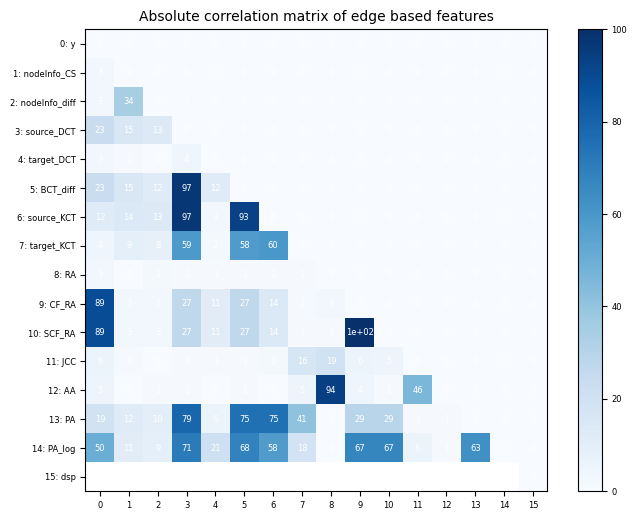

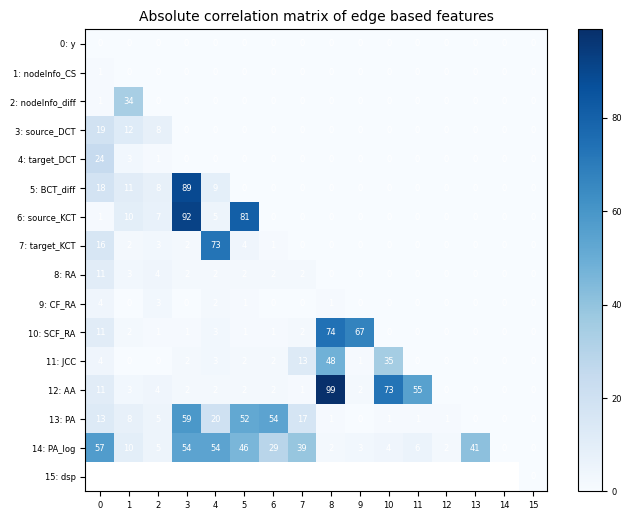

In [6]:
# plot correlation with target (first train, then validation)
for df in [train_tf, val_tf]:
    analyseData.plot_corr_matrix(df.iloc[:, 2:])

### 3. Modeling

In [20]:
# basic XGBoost (best to use for RFECV as very short runtime)
clf = XGBClassifier(n_estimators = 35, max_depth = 2, eta = 0.0005, colsample_bytree = 0.1, colsample_bylevel = 0.2)
clf.fit(X_train, y_train)

# predict train
y_train_hat = clf.predict(X_train)
# compute R^2 metric
acc_train = accuracy_score(y_train, y_train_hat)

# predict val
y_val_hat = clf.predict(X_val)
# compute R^2 metric
acc_val = accuracy_score(y_val, y_val_hat)

# print performance
print(f"Acc train: {acc_train}")
print(f"Acc val : {acc_val}")

Acc train: 0.921962879640045
Acc val : 0.7688637041455413


In [21]:
# detailed performance analysis
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Validation performance')
print('-------------------------------------------------------')
print(classification_report(y_val, y_val_hat))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_val, y_val_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_val, y_val_hat))

Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      3516
           1       0.89      0.96      0.93      3596

    accuracy                           0.92      7112
   macro avg       0.93      0.92      0.92      7112
weighted avg       0.92      0.92      0.92      7112

Validation performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.73      0.87      0.80      1732
           1       0.82      0.66      0.74      1621

    accuracy                           0.77      3353
   macro avg       0.78      0.77      0.77      3353
weighted avg       0.78      0.77      0.77      3353

Roc_auc score
-------------------------------------------------------
0.7654768960511075

Confusion matrix
-------------------------------------------------------
[[1503  229]
 [ 546 1075]]


In [22]:
# rerun model on whole training data
clf = XGBClassifier(n_estimators = 35, max_depth = 2, eta = 0.0005, colsample_bytree = 0.1, colsample_bylevel = 0.2)
clf.fit(X_trainval, y_trainval)

# predict test
y_test_hat = clf.predict(X_test)

In [27]:
# save test predictions
save_test = modeling.save_test_preds(test, test_tf, y_test_hat)

In [28]:
save_test.value_counts()

Predicted
1            1983
0            1515
dtype: int64